In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import Convolution2D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
len(X_train),len(X_test)

(60000, 10000)

Label: 5


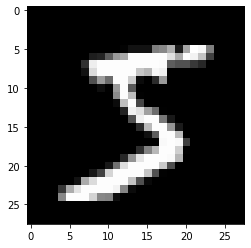

In [4]:
image = X_train[0]
plt.imshow(image, cmap='gray')
print('Label:', y_train[0])

In [5]:
X_train[20].shape[0]

28

In [6]:
X_train = X_train.reshape(len(X_train),X_train[0].shape[0],X_train[0].shape[1],1)
X_test = X_test.reshape(len(X_test),X_test[0].shape[0],X_test[0].shape[1],1)

In [7]:
from keras.utils import to_categorical

In [8]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
X_train = X_train /255.0
X_test = X_test /255.0

In [10]:
def create_model():
  num_classes=10
  model = Sequential()
  model.add(Convolution2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
  model.add(Convolution2D(64,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(256,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  return model


In [11]:
model = create_model()

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2359552   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

In [13]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,verbose=1,batch_size=128)

Epoch 1/10
469/469 [==============================] - 11s 9ms/step - loss: 0.4070 - accuracy: 0.8704 - val_loss: 0.0439 - val_accuracy: 0.9854
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0706 - accuracy: 0.9788 - val_loss: 0.0365 - val_accuracy: 0.9883
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0483 - accuracy: 0.9856 - val_loss: 0.0297 - val_accuracy: 0.9906
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0358 - accuracy: 0.9889 - val_loss: 0.0294 - val_accuracy: 0.9899
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0290 - accuracy: 0.9904 - val_loss: 0.0267 - val_accuracy: 0.9914
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0256 - accuracy: 0.9918 - val_loss: 0.0292 - val_accuracy: 0.9907
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0238 - accuracy: 0.9924 - val_loss: 0.0258 - val_accuracy: 0.9915
Epoch

In [14]:
scores = model.evaluate(X_test,y_test)
print(scores)

313/313 [==============================] - 1s 2ms/step - loss: 0.0296 - accuracy: 0.9915
[0.029581192880868912, 0.9915000200271606]


In [16]:
model.save('trained_model.h5')